# *Elements of Statistical Learning* - Exercise 2.8

> **Author**: Lorenzo BATTARRA
>
> **Last reviewed**: 2019/12/22

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# matplotlib styling

#plt.style.available[:20]
plt.style.use('ggplot')

In [3]:
#Add `pyesl` path

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

from pyesl.esl_helpers import plt_style

In [4]:
data_dir = '../../Data/'

## 1. Loading data

In [5]:
# usecols is needed as there are trailing spaces, hence a column filled with NaNs

zip_train = pd.read_csv(os.path.join(data_dir, 'zip.train.gz'), header=None, sep=' ', usecols=list(range(257)))
zip_test = pd.read_csv(os.path.join(data_dir, 'zip.test.gz'), header=None, sep=' ', usecols=list(range(257)))

In [6]:
# filter out only the 2's and the 3's

zip_train = zip_train.loc[(zip_train[0] == 2) | (zip_train[0] == 3)]
zip_test = zip_test.loc[(zip_test[0] == 2) | (zip_test[0] == 3)]

In [7]:
# extract responses: column 0

zip_train_Y = np.array(zip_train[0])
zip_test_Y = np.array(zip_test[0])

# extract predictors: drop column 0

zip_train.drop([0], axis = 1, inplace = True)
zip_test.drop([0], axis = 1, inplace = True)
zip_train_X = np.array(zip_train)
zip_test_X = np.array(zip_test)

## 3. Training

### Importing models from `pyesl` and `scikit-learn`

In [9]:
# implemented OLS classification and KNN classification from scratch
# to illustrate inner workings - terribly suboptimal :)

from pyesl.ch2 import OLSClassifier, KNNClassifier

### Training

In [10]:
models = {
    "OLS": OLSClassifier()
}

ks = np.array(range(1, 26))

for k in ks:
    models[str(k) + "-NN"] = KNNClassifier(k=k)    
    
errors_df = pd.DataFrame(columns=['train_error', 'test_error'])

for name, model in tqdm(list(models.items())):
    model.fit(zip_train_X, zip_train_Y)
    
    trainingError = 1.0 - np.average(zip_train_Y == model.predict(zip_train_X))
    testError = 1.0 - np.average(zip_test_Y == model.predict(zip_test_X))
    
    errors_df.loc[name] = [trainingError, testError]
    
errors_df.head(10)

100%|██████████| 26/26 [00:04<00:00,  5.43it/s]


,train_error,test_error
OLS,0.005760,0.041209
1-NN,0.000000,0.024725
2-NN,0.005760,0.024725
3-NN,0.005040,0.030220
4-NN,0.004320,0.027473
5-NN,0.005760,0.030220
6-NN,0.005040,0.030220
7-NN,0.006479,0.032967
8-NN,0.005760,0.032967
9-NN,0.009359,0.035714


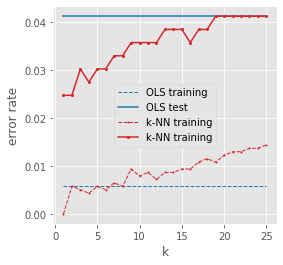

In [11]:
figWidth = 4
figHeight = 4

fig = plt.figure(figsize=(figWidth,figHeight))
ax = fig.add_subplot(111)

ax.plot(ks, np.repeat(errors_df.loc["OLS", "train_error"], 25), 
        label='OLS training', **plt_style('dashed', 'thin', 'color1'))

ax.plot(ks, np.repeat(errors_df.loc["OLS", "test_error"], 25), 
        label='OLS test', **plt_style('thick', 'color1'))

ax.plot(ks, errors_df.loc[errors_df.index != 'OLS', 'train_error'], 
        label='k-NN training', **plt_style('dashed', 'thin', 'mark_small', 'color2'))

ax.plot(ks, errors_df.loc[errors_df.index != 'OLS', 'test_error'], 
        label='k-NN training', **plt_style('thick', 'mark_large', 'color2'))

ax.set_xlabel('k')
ax.set_ylabel('error rate')
ax.legend()

plt.show()

In [12]:
ax.get_figure().savefig('../../notes/Figures/E2p8_A.pdf', bbox_inches='tight', pad_inches = 0)